In [2]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

# Load the feature files and combine the features
features_ctl_s1 = pd.read_csv('../GSEA/miRNA/50_ctl_s1.csv')['Feature'].tolist()
features_s1_s2 = pd.read_csv('../GSEA/miRNA/50_s1_s2.csv')['Feature'].tolist()
features_s2_s3 = pd.read_csv('../GSEA/miRNA/50_s2_s3.csv')['Feature'].tolist()
features_s3_s4 = pd.read_csv('../GSEA/miRNA/50_s3_s4.csv')['Feature'].tolist()

all_selected_features = list(set(features_ctl_s1 + features_s1_s2 + features_s2_s3 + features_s3_s4))

print(len(all_selected_features))  # Ensure the total number of unique features

98


In [4]:
# Load and prepare the original stage data
ctl_samples = pd.read_csv('../data/control/control_samples.csv')
print(ctl_samples.shape)
ctl_samples.columns = ctl_samples.columns.str.strip()
ctl_samples = ctl_samples[ctl_samples['Sex'] == 'Sex: Male']
print(ctl_samples.shape)
stage_1_samples = pd.read_csv('../data/cancer/stage_1_prostate_cancer_samples.csv')
stage_2_samples = pd.read_csv('../data/cancer/stage_2_prostate_cancer_samples.csv')
stage_3_samples = pd.read_csv('../data/cancer/stage_3_prostate_cancer_samples.csv')
stage_4_samples = pd.read_csv('../data/cancer/stage_4_prostate_cancer_samples.csv')

# Add stage column for easier concatenation
ctl_samples['Stage'] = 'CTRL'
stage_1_samples['Stage'] = 'S1'
stage_2_samples['Stage'] = 'S2'
stage_3_samples['Stage'] = 'S3'
stage_4_samples['Stage'] = 'S4'

(5643, 2570)
(2468, 2570)


In [5]:

# Combine all stages data
combined_data = pd.concat([ctl_samples, stage_1_samples, stage_2_samples, stage_3_samples, stage_4_samples], ignore_index=True)

# Ensure only numeric columns are used
numeric_columns = combined_data.columns.drop(['Sample_ID', 'Sex', 'Age', 'Stage', 'Disease'])

# Calculate the average expression levels for each miRNA for each stage
average_expression = combined_data.groupby('Stage')[numeric_columns].mean().T

# Ensure all selected features are present in the data
selected_features_in_data = [feature for feature in all_selected_features if feature in average_expression.index]

print("Features present in data:", len(selected_features_in_data))

# Print missing features
missing_features = set(all_selected_features) - set(selected_features_in_data)
if missing_features:
    print("Missing features:", missing_features)

# Extract the selected features from the average expression data
selected_expression = average_expression.loc[selected_features_in_data]

# Normalize each miRNA across stages
normalized_expression = selected_expression.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Check if the normalization removes any miRNAs
print("Normalized expression shape:", normalized_expression.shape)

Features present in data: 98
Normalized expression shape: (98, 5)


In [6]:
# Perform hierarchical clustering on the normalized data
linked = linkage(normalized_expression, method='ward')

# Create a heatmap with dendrogram
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)  # Reduce font scale for better visibility
clustermap = sns.clustermap(normalized_expression, row_linkage=linked, col_cluster=False, cmap='viridis', figsize=(15, 10))

# Enhance the heatmap
clustermap.ax_heatmap.set_title('Hierarchical Clustering and Heatmap of Selected miRNA Expression Levels', fontsize=16, pad=20)
clustermap.ax_heatmap.set_xlabel('Cancer Stages', fontsize=14)
clustermap.ax_heatmap.set_ylabel('Selected miRNAs', fontsize=14)
clustermap.ax_heatmap.tick_params(axis='x', rotation=45)

# Set y-tick labels to ensure all miRNAs are displayed
clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8)  # Adjust fontsize for y-tick labels

# Add color bar legend with a title
cbar = clustermap.ax_heatmap.collections[0].colorbar
cbar.set_label('Normalized Expression Level', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Set color bar title
cbar.ax.set_title('Normalized Expression Level', fontsize=14, pad=10)

plt.tight_layout()

# Save the figure
# plt.savefig('../data/heatmap_clustering_normalized_all_features.png')
plt.show()

<Figure size 1500x1000 with 0 Axes>

KeyboardInterrupt: 

- For each of the 7 different groups from hierarchical clustering, choose one miRNA and perform analysis on it to give a sample from that group
	- ANOVA Statistical Analysis
	- Post HOC Analysis
	- Plot expression over groups using bar plot

## Random Sampling From the 7 Clusters

In [ ]:
# import pandas as pd
# import seaborn as sns
# from scipy.cluster.hierarchy import fcluster
# from scipy.stats import f_oneway
# import matplotlib.pyplot as plt
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # Assign clusters
# num_clusters = 7
# clusters = fcluster(linked, num_clusters, criterion='maxclust')

# # Sample one miRNA from each cluster
# sampled_miRNAs = []
# for cluster_id in range(1, num_clusters + 1):
#     cluster_miRNAs = normalized_expression.index[clusters == cluster_id]
#     sampled_miRNA = cluster_miRNAs[0]  # Select the first miRNA in the cluster
#     sampled_miRNAs.append(sampled_miRNA)

# print("Sampled miRNAs from each cluster:", sampled_miRNAs)

# # Perform ANOVA and Post Hoc analysis on normalized data
# for miRNA in sampled_miRNAs:
#     miRNA_data = combined_data[['Stage', miRNA]]
#     miRNA_data = miRNA_data.dropna()

#     # Normalize within each miRNA across all stages
#     miRNA_data['Normalized'] = miRNA_data.groupby('Stage')[miRNA].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

#     # ANOVA on normalized data
#     anova_result = f_oneway(
#         miRNA_data[miRNA_data['Stage'] == 'Stage 1']['Normalized'],
#         miRNA_data[miRNA_data['Stage'] == 'Stage 2']['Normalized'],
#         miRNA_data[miRNA_data['Stage'] == 'Stage 3']['Normalized'],
#         miRNA_data[miRNA_data['Stage'] == 'Stage 4']['Normalized']
#     )

#     print(f"ANOVA result for {miRNA}: F={anova_result.statistic}, p={anova_result.pvalue}")

#     # Post Hoc Analysis with Tukey HSD on normalized data
#     tukey_result = pairwise_tukeyhsd(endog=miRNA_data['Normalized'], groups=miRNA_data['Stage'], alpha=0.05)
#     print(tukey_result)

#     # Plot normalized expression over groups using bar plot
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='Stage', y='Normalized', data=miRNA_data, ci='sd')
#     plt.title(f'Normalized Expression of {miRNA} across Cancer Stages')
#     plt.xlabel('Cancer Stages')
#     plt.ylabel('Normalized Expression Level')
#     plt.tight_layout()
#     plt.show()

## Specific Sampling from the 7 Clusters

/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


ANOVA result for hsa-miR-548h-5p: F=nan, p=nan
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  CTRL     S1   0.1167    0.0  0.0819  0.1515   True
  CTRL     S2    0.052    0.0   0.028  0.0759   True
  CTRL     S3   0.1244    0.0  0.0872  0.1616   True
  CTRL     S4   0.0961    0.0  0.0489  0.1434   True
    S1     S2  -0.0647 0.0001 -0.1051 -0.0244   True
    S1     S3   0.0077 0.9933 -0.0417   0.057  False
    S1     S4  -0.0206 0.8643 -0.0779  0.0367  False
    S2     S3   0.0724    0.0    0.03  0.1148   True
    S2     S4   0.0442 0.1314 -0.0073  0.0956  False
    S3     S4  -0.0282 0.6843  -0.087  0.0305  False
----------------------------------------------------


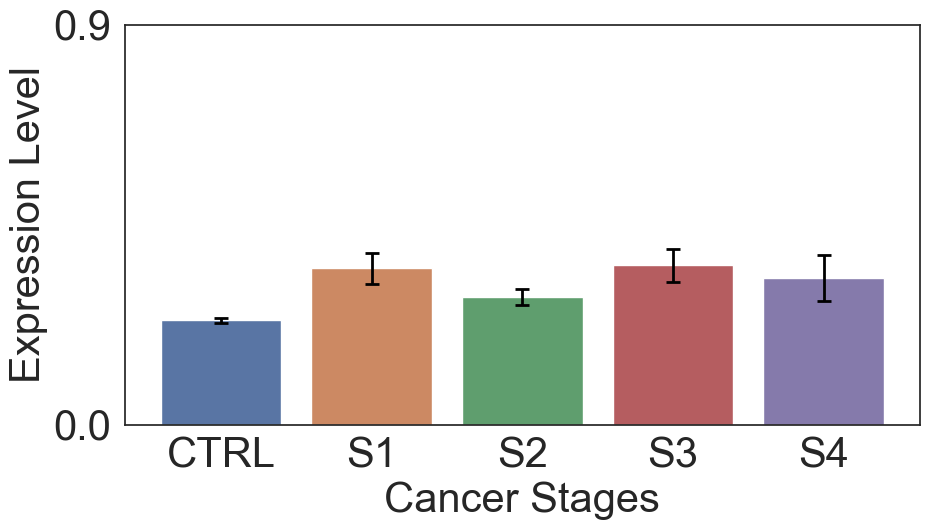

ANOVA result for hsa-miR-6769b-5p: F=nan, p=nan


/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  CTRL     S1   0.0006    1.0 -0.0182  0.0195  False
  CTRL     S2   0.0891    0.0  0.0761  0.1021   True
  CTRL     S3  -0.0838    0.0 -0.1039 -0.0636   True
  CTRL     S4   -0.121    0.0 -0.1466 -0.0954   True
    S1     S2   0.0885    0.0  0.0666  0.1104   True
    S1     S3  -0.0844    0.0 -0.1111 -0.0576   True
    S1     S4  -0.1216    0.0 -0.1526 -0.0905   True
    S2     S3  -0.1729    0.0 -0.1959 -0.1499   True
    S2     S4  -0.2101    0.0  -0.238 -0.1822   True
    S3     S4  -0.0372 0.0125 -0.0691 -0.0054   True
----------------------------------------------------


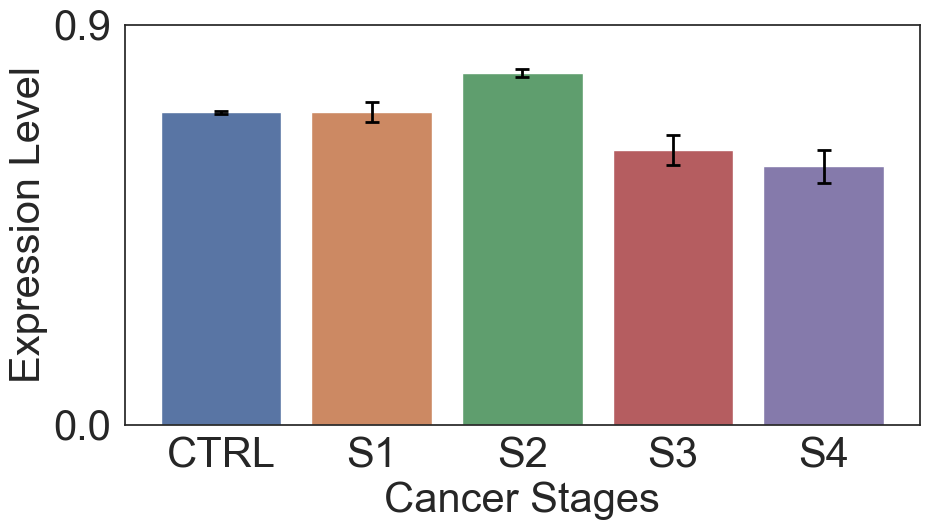

ANOVA result for hsa-miR-8059: F=nan, p=nan


/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  CTRL     S1   0.2681    0.0   0.241  0.2951   True
  CTRL     S2    0.337    0.0  0.3184  0.3557   True
  CTRL     S3   0.3508    0.0  0.3219  0.3797   True
  CTRL     S4   0.2355    0.0  0.1988  0.2722   True
    S1     S2    0.069    0.0  0.0377  0.1003   True
    S1     S3   0.0828    0.0  0.0444  0.1211   True
    S1     S4  -0.0326 0.2674  -0.077  0.0119  False
    S2     S3   0.0138 0.7848 -0.0192  0.0467  False
    S2     S4  -0.1015    0.0 -0.1415 -0.0616   True
    S3     S4  -0.1153    0.0  -0.161 -0.0697   True
----------------------------------------------------


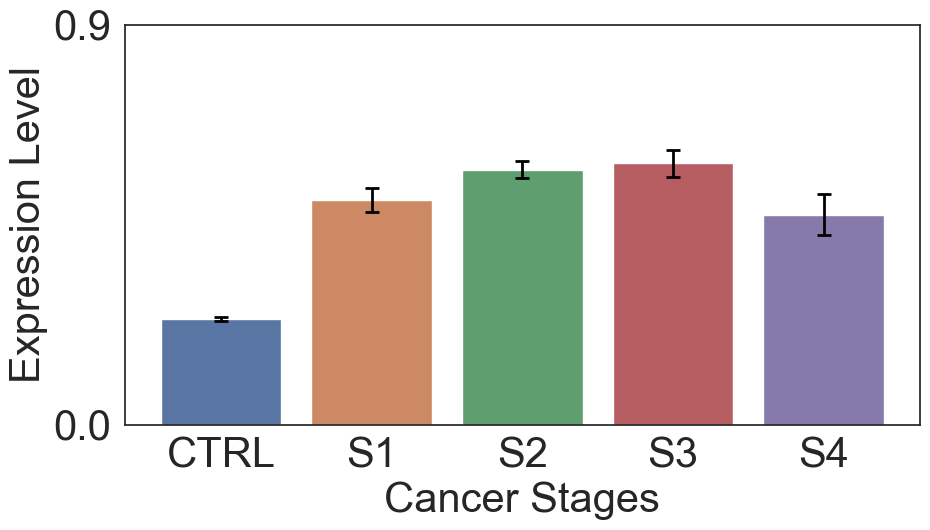

ANOVA result for hsa-miR-3184-5p: F=nan, p=nan


/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  CTRL     S1  -0.0421    0.0 -0.0642 -0.0199   True
  CTRL     S2   0.0436    0.0  0.0283  0.0588   True
  CTRL     S3   0.0911    0.0  0.0674  0.1148   True
  CTRL     S4   0.0252 0.1475 -0.0048  0.0553  False
    S1     S2   0.0857    0.0    0.06  0.1113   True
    S1     S3   0.1331    0.0  0.1017  0.1646   True
    S1     S4   0.0673    0.0  0.0308  0.1038   True
    S2     S3   0.0475    0.0  0.0205  0.0745   True
    S2     S4  -0.0183 0.5434 -0.0511  0.0144  False
    S3     S4  -0.0658    0.0 -0.1032 -0.0284   True
----------------------------------------------------


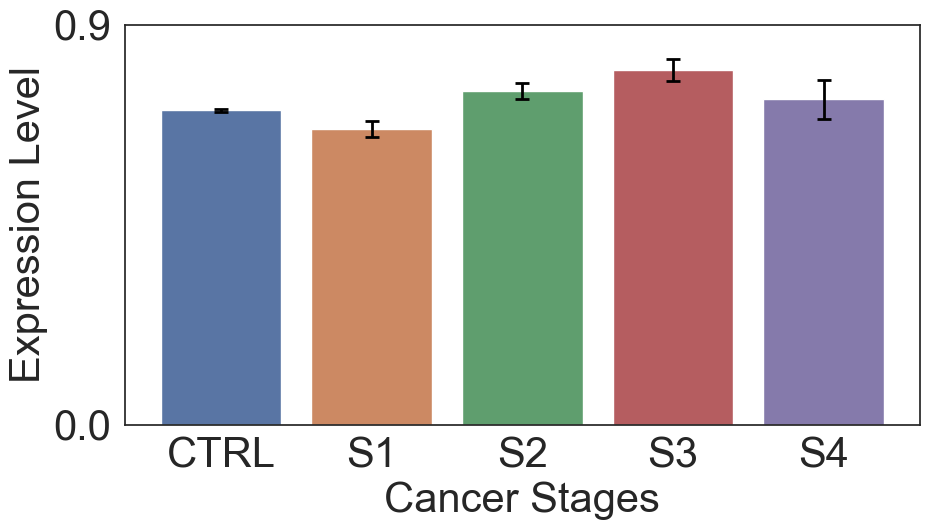

In [7]:
miRNAs_to_analyze = ['hsa-miR-548h-5p', 'hsa-miR-6769b-5p', 'hsa-miR-8059', 'hsa-miR-3184-5p']

sns.set_style("white")

plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('font', size=30)     

# Perform ANOVA and Post Hoc analysis on specified miRNAs
for miRNA in miRNAs_to_analyze:
    miRNA_data = combined_data[['Stage', miRNA]]
    miRNA_data = miRNA_data.dropna()

    # Normalize within each miRNA across all stages
    miRNA_data['Normalized'] = miRNA_data.groupby('Stage')[miRNA].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

    # ANOVA on normalized data
    anova_result = f_oneway(
        miRNA_data[miRNA_data['Stage'] == 'Control ']['Normalized'],
        miRNA_data[miRNA_data['Stage'] == 'Stage 1']['Normalized'],
        miRNA_data[miRNA_data['Stage'] == 'Stage 2']['Normalized'],
        miRNA_data[miRNA_data['Stage'] == 'Stage 3']['Normalized'],
        miRNA_data[miRNA_data['Stage'] == 'Stage 4']['Normalized']
    )

    print(f"ANOVA result for {miRNA}: F={anova_result.statistic}, p={anova_result.pvalue}")

    # Post Hoc Analysis with Tukey HSD on normalized data
    tukey_result = pairwise_tukeyhsd(endog=miRNA_data['Normalized'], groups=miRNA_data['Stage'], alpha=0.05)
    print(tukey_result)

    mean_data = miRNA_data.groupby('Stage')['Normalized'].mean().reset_index()
    sem_data = miRNA_data.groupby('Stage')['Normalized'].sem().reset_index()
    mean_data['2*SEM'] = 2 * sem_data['Normalized']

    # Plot normalized expression over groups using bar plot
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x='Stage', y='Normalized', data=mean_data)
    
    # Add error bars with horizontal caps
    for i, stage in enumerate(mean_data['Stage']):
        plt.errorbar(
            x=i, 
            y=mean_data.loc[i, 'Normalized'], 
            yerr=mean_data.loc[i, '2*SEM'], 
            fmt='none', 
            c='black', 
            capsize=5, 
            capthick=2, 
            elinewidth=2  # Increase the error bar line width
        )

    plt.xlabel('Cancer Stages', fontsize=30)
    plt.ylabel('Expression Level', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.yticks([0, 0.9])
    plt.tight_layout()
    plt.show()